# TS6: Respuesta en frecuencia de Filtros Pasivos RLC

### Autoras: Angelina Fantauzzo Fabio y Noelia Ferrari


**Consigna**: 


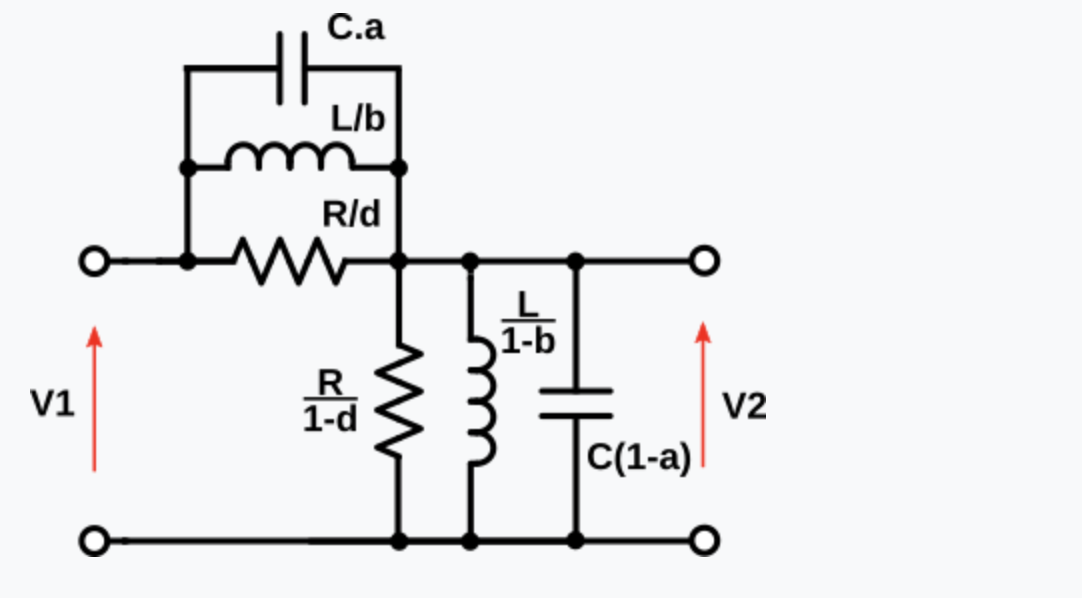

In [2]:
from IPython.display import Image
import os
Image(filename=os.path.join("circuito.png"))

1. Demostrar que la función de transferencia $$
                                             T(s)=\frac{V_2(s)}{V_1(s)}
                                             $$

se corresponde con una **sección bicuadrática ($\text{SOS}$)**, es decir:

$$
T(s)=k\cdot\frac{s^{2}+\dfrac{\omega_{0Z}}{Q_{Z}}\,s+\omega_{0Z}^{2}}
{s^{2}+\dfrac{\omega_{0P}}{Q_{P}}\,s+\omega_{0P}^{2}}.
$$

2. Parametrice los polinomios de segundo orden, hallando los parámetros $k, \omega_{0Z}, Q_{Z}, \omega_{0P}, Q_{P}$ en función de los elementos de la red.

3. Para cada función, utilice la **red bicuadrática** para implementarla:

1. La función $T_1(s)$:
$$
T_1(s) = \frac{s^{2}+9}{s^{2}+s\sqrt{2}+1}
$$

2. La función $T_2(s)$:
$$
T_2(s) = \frac{s^{2}+1/9}{s^{2}+s\frac{1}{5}+1}
$$

3. La función $T_3(s)$:
$$
T_3(s) = \frac{s^{2}+s\frac{1}{5}+1}{s^{2}+s\sqrt{2}+1}
$$

4. Dibuje el **diagrama de polos y ceros** de $H(s)$, indique la localización de polos y ceros en función de los parámetros.

5. Calcular y graficar la **respuesta de módulo y fase**, indicando la **respuesta asintótica** donde corresponda.

## Introducción teórica

Este trabajo el circuito propuesto corresponde a una **red pasiva de segundo orden** compuesta por resitencias, inductancias y capacitores, cuyos valores están dador por parámetros a, b y d. 
La función de transferencia:
$$                                           T(s)=\frac{V_2(s)}{V_1(s)}
$$
puede expresarse en la forma general de una **sección bicuadrática (SOS, Second Order Section)**, que se utiliza ampliamente en la construcción de filtros.

La sección bicuadrática se expresa como:
$$
T(s)=k\cdot\frac{s^{2}+\dfrac{\omega_{0Z}}{Q_{Z}}\,s+\omega_{0Z}^{2}}
{s^{2}+\dfrac{\omega_{0P}}{Q_{P}}\,s+\omega_{0P}^{2}}.
$$
donde:
* $k$: Es la ganancia.
* $\omega_{0Z}$ y $\omega_{0P}$: Son las frecuencias angulares características asociadas a los ceros y polos del sistema, respectivamente.
* $Q_Z$ y $Q_P$: Son los factores de calidad que determinan el amortiguamiento o selectividad de los ceros y polos.

## Punto 1

Para el primerejercicio conviene analizar el circuito por admitancias debido a que como las ramas estan paralelo en admitancias se calculan en forma de sumatoria.


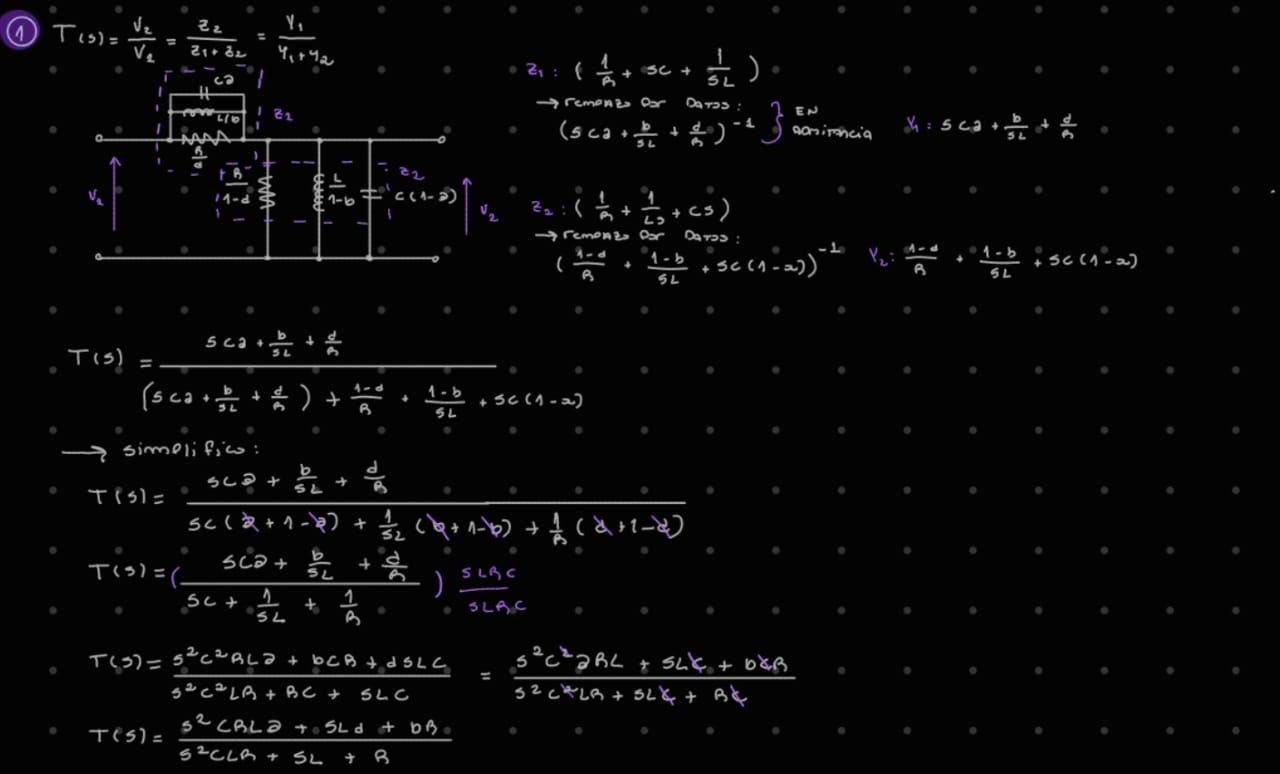

In [3]:
Image(filename=os.path.join("punto1_a.jpeg"))

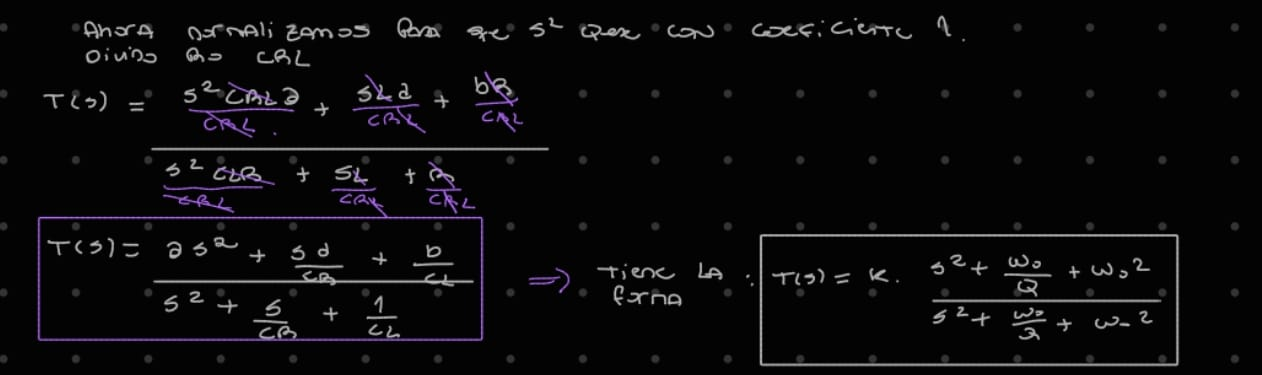

In [4]:
Image(filename=os.path.join("punto1_b.jpeg"))

## Punto 2

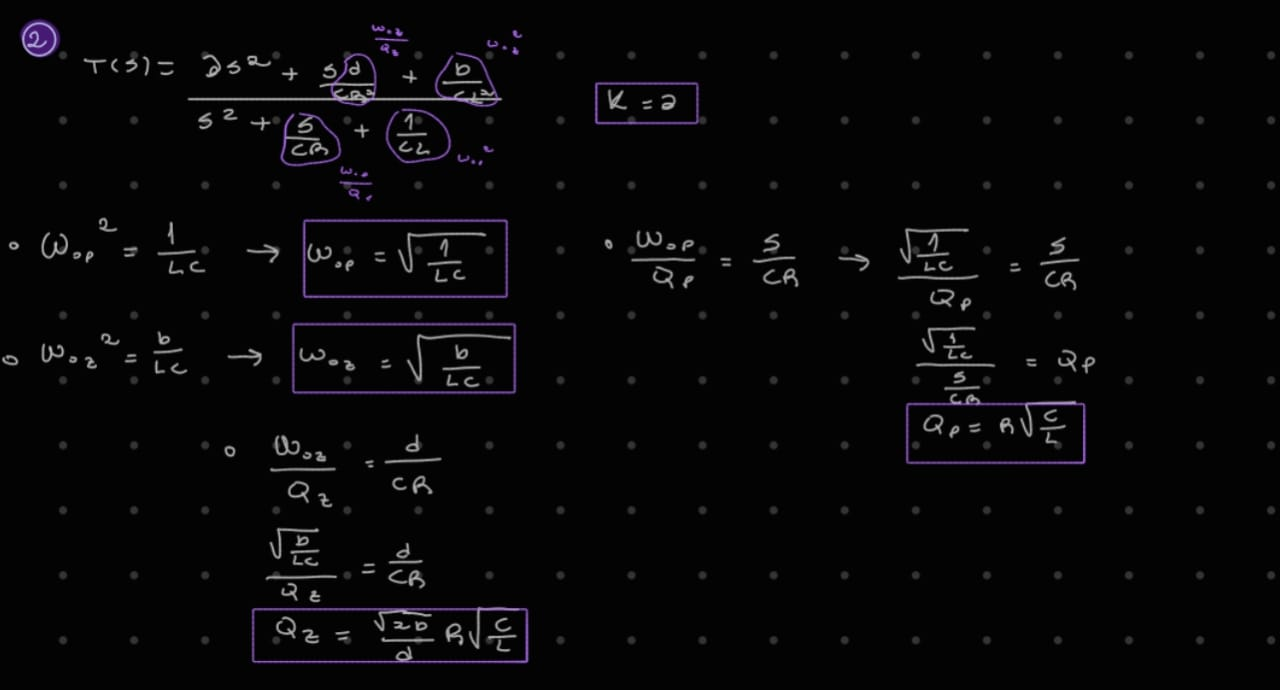

In [5]:
Image(filename=os.path.join("punto2.jpeg"))

## Punto 3

### T1(s)

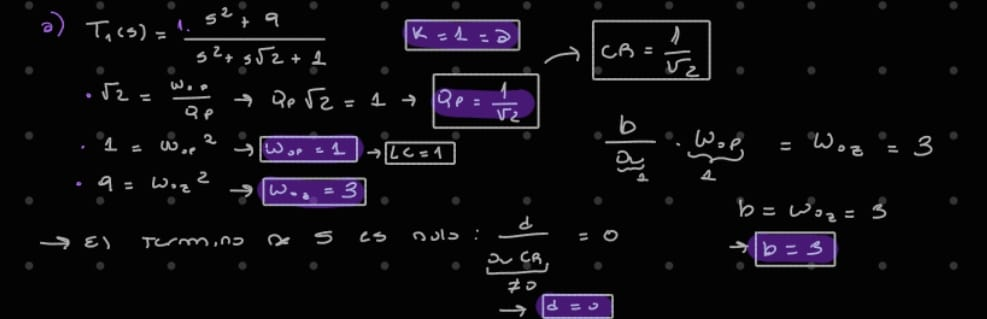

In [6]:
Image(filename=os.path.join("punto3_a.jpeg"))

### T2(s)

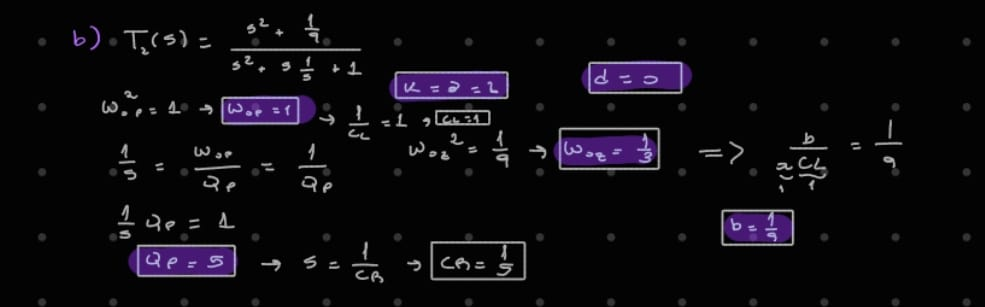

In [7]:
Image(filename=os.path.join("punto3_b.jpeg"))

### T3(s)

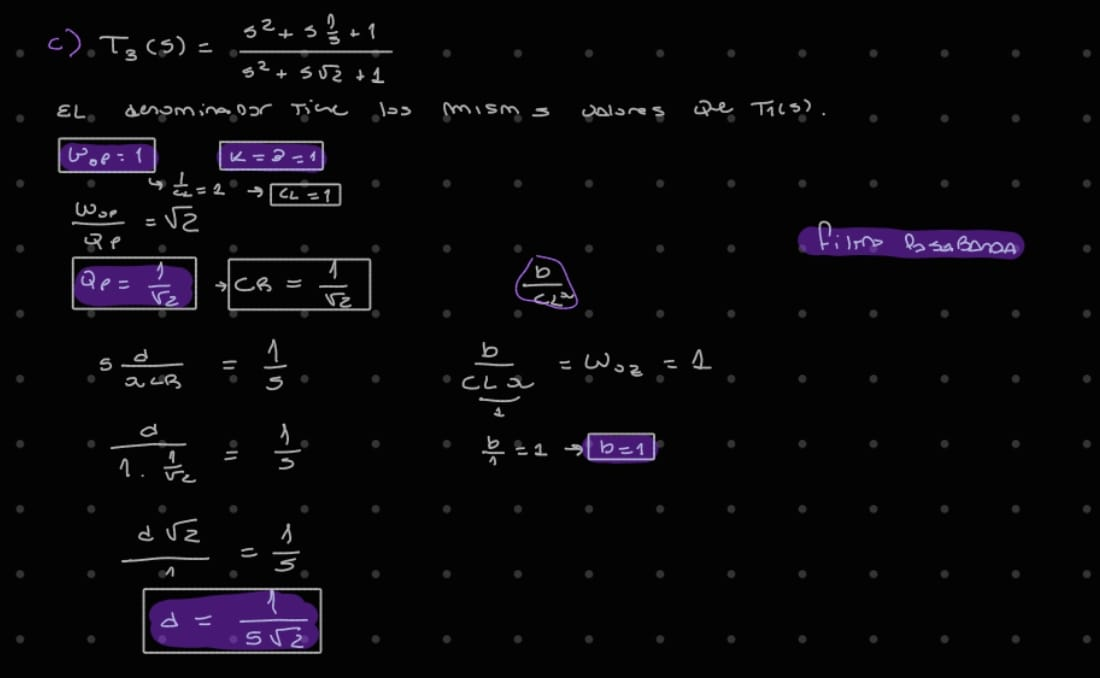

In [8]:
Image(filename=os.path.join("punto3_c.jpeg"))

## Punto 4

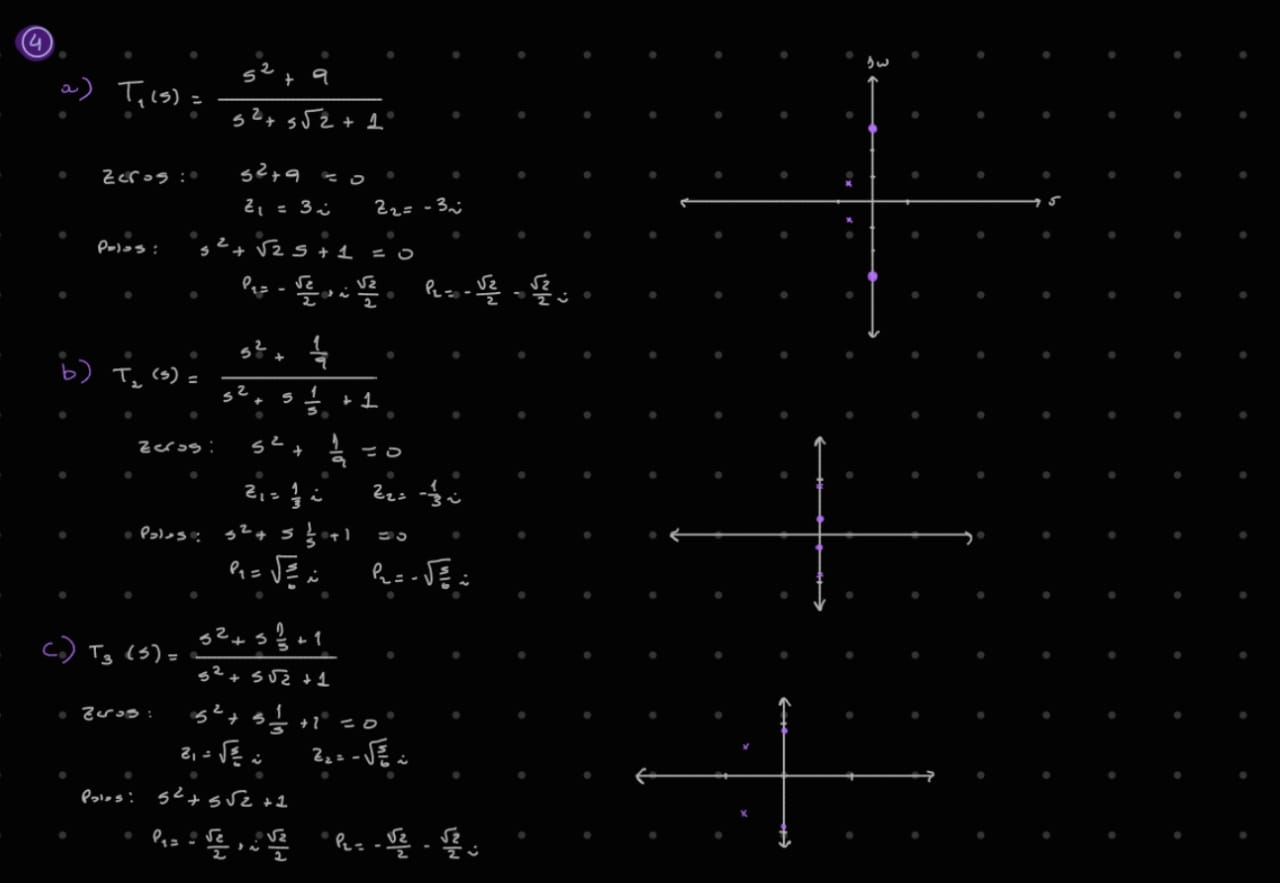

In [9]:
Image(filename=os.path.join("punto4.jpeg"))

## Punto 5

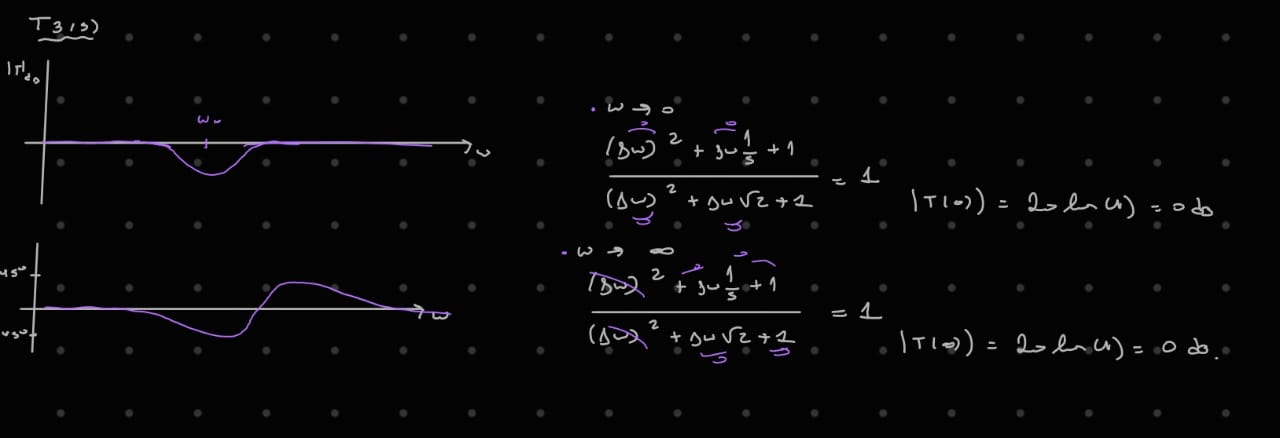

In [10]:
Image(filename=os.path.join("punto5_a.jpeg"))



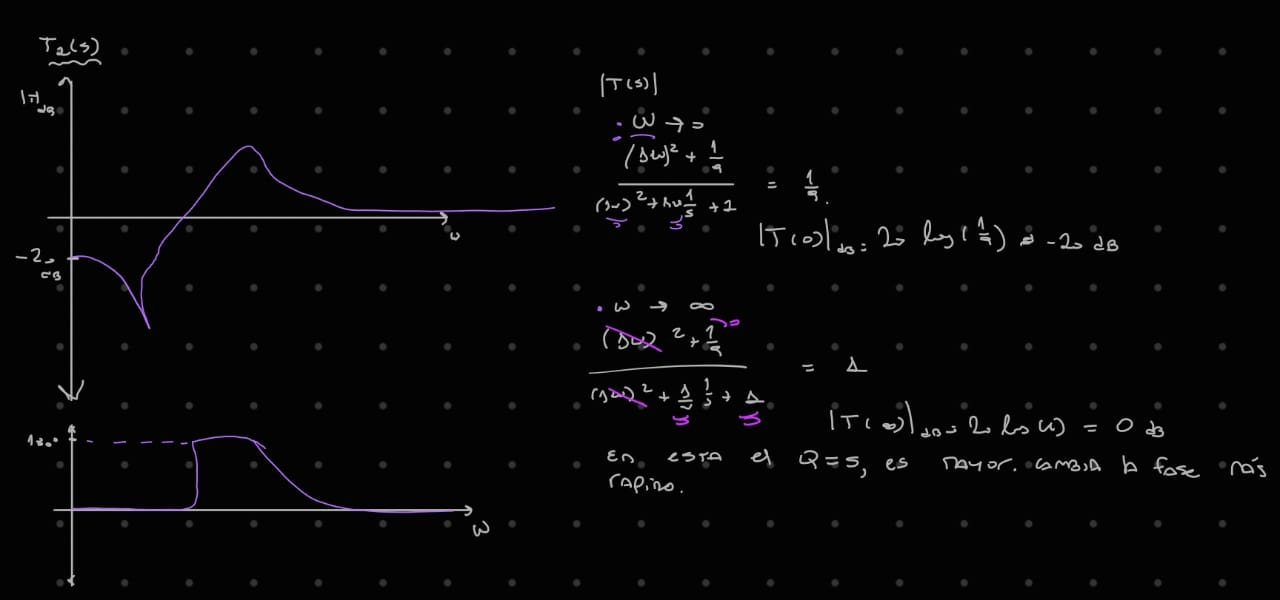

In [11]:
Image(filename=os.path.join("punto5_b.jpeg"))

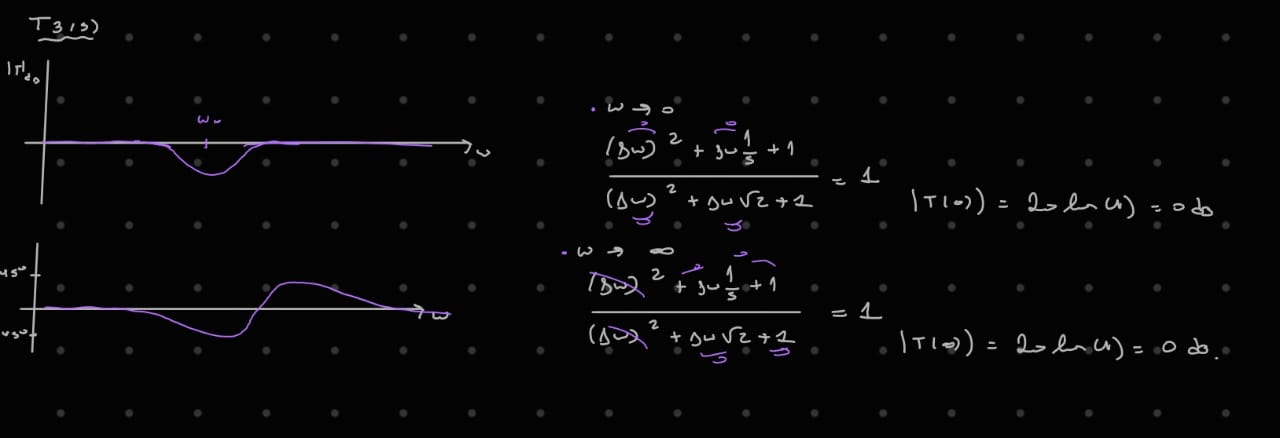

In [12]:
Image(filename=os.path.join("punto5_c.jpeg"))

Los graficos primero los graficamos en Python para ver donde estaban los picos y ver como afectaba el valor de Q con el siguiente codigo:

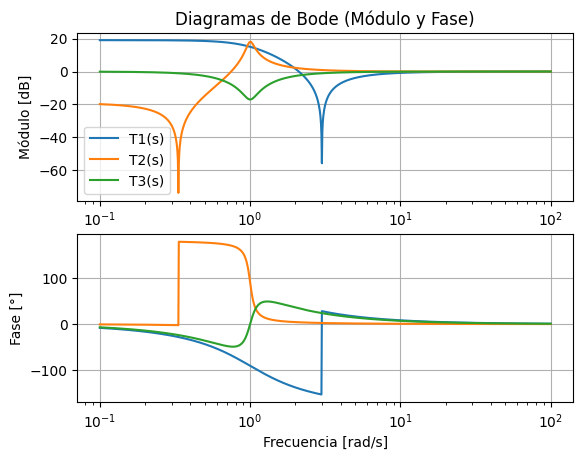

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

T1 = signal.TransferFunction([1, 0, 9], [1, np.sqrt(2), 1])
T2 = signal.TransferFunction([1, 0, 1/9], [1, 1/9, 1])
T3 = signal.TransferFunction([1, 1/5, 1], [1, np.sqrt(2), 1])

w = np.logspace(-1, 2, 1000)  # de 0.1 a 100 rad/s

# T1
w1, mag1, phase1 = signal.bode(T1, w)
# T2
w2, mag2, phase2 = signal.bode(T2, w)
# T3
w3, mag3, phase3 = signal.bode(T3, w)

plt.figure()
# Módulo
plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label="T1(s)")
plt.semilogx(w2, mag2, label="T2(s)")
plt.semilogx(w3, mag3, label="T3(s)")
plt.title("Diagramas de Bode (Módulo y Fase)")
plt.ylabel("Módulo [dB]")
plt.legend()
plt.grid(True)

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label="T1(s)")
plt.semilogx(w2, phase2, label="T2(s)")
plt.semilogx(w3, phase3, label="T3(s)")
plt.ylabel("Fase [°]")
plt.xlabel("Frecuencia [rad/s]")
plt.grid(True)

plt.show()


# Analisis de los resultados

Las tres funciones de transferencia analizadas corresponden a sistemas de segundo orden, donde la ubicación de polos y ceros determina el tipo de filtro y la forma de la respuesta en frecuencia. En todos los casos, la frecuencia natural de los polos y el factor de calidad $Q$ controlan la selectividad y la amplitud de la respuesta.  

Podemos ver que $T_1(s)$ y $T_3(s)$ son **filtros pasabanda**, pero con diferentes valores de $Q$. La $T_1(s)$ posee un $Q$ moderado ($Q \approx 0.707$), lo que genera un pico de resonancia perceptible pero no muy pronunciado. Además, la fase desciende desde $0^\circ$ hasta $-180^\circ$ y luego retorna a $0^\circ$, característica típica de los filtros pasabanda. Por otro lado, $T_3(s)$, al poseer un $Q$ más elevado, tiene un ancho de banda más reducido y la resonancia se hace más aguda. También se observan cambios en el gráfico de fase, debido a un mayor amortiguamiento por la ubicación de los polos y ceros, la variación de la fase es más suave y progresiva. En este filtro, la magnitud se mantiene prácticamente constante, por lo que el efecto del $Q$ se percibe principalmente en la fase.  

En cuanto a $T_2(s)$, este sistema corresponde a un **filtro suprimebanda**, ya que atenúa las frecuencias alrededor de $\omega \approx 1$ mientras deja pasar las bajas y altas frecuencias. La $Q$ es baja, lo que genera una gran atenuación pero poco profunda; si $Q$ aumentara, la banda de rechazo se estrecharía y la atenuación sería más intensa en la frecuencia central, mientras que las frecuencias cercanas permanecerían casi intactas. De esta manera, $Q$ determina la selectividad del filto, valores altos producen un rechazo estrecho y definido, mientras que valores bajos generan una atenuacion más ancho y gradual.

En conjunto, puede observarse que el factor de calidad $Q$ determina la selectividad del sistema: valores altos de $Q$ producen resonancias más agudas o rechazos más estrechos, mientras que valores bajos generan respuestas más amplias y atenuadas. Los ceros determinan las regiones de atenuación, los polos las de resonancia, y la relación entre ambos define el tipo de filtro y la forma del diagrama de fase.


## Bonus

Se pueden conectar en cascada $T_1(s)$ y $T_2(s)$ utilizando un buffer entre ambos para evitar que la carga de un filtro afecte al otro. Al conectarlos de esta manera, la salida del primer filtro alimenta al segundo sin interacción directa.  

La respuesta resultante sería la combinación de ambos efectos, la $T_1(s)$ aportaría su comportamiento pasabanda, amplificando la franja de frecuencias alrededor de $\omega0 \approx 1$ y la $T_2(s)$ aplicaría su efecto suprimiendo frecuencias en la misma región.  

Al combinar ambos, el sistema final sería un filtro de orden 4, cuya magnitud y fase resultante reflejarían la interacción entre la banda amplificada por $T_1(s)$ y la banda atenuada por $T_2(s)$.
